<a href="https://colab.research.google.com/github/HugoStigletz/Data-Analytics-Portfolio/blob/main/6_6_1_Moving_Avg_%26_Exponential_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 6.6.1 - Time Series Review and Case Study Activity

##You are working for an environmental scientist tasked by the governor of California to determine if destructive wildfires in the state are on the rise.

You have been given a data set containing the number of wildfires that lasted more than a day that occurred in California each year from 1992 to 2015.

In this activity, we will explore a few different ways to analyze this data.

At the end, it will be your job to come to a conclusion and report your results to the governor.



#Step 1: Download and save the `CA_Wildfires_by_year.csv` data set from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `CA_Wildfires_by_year.csv` data set by running the following code block 

* When prompted, navigate to and select the `CA_Wildfires_by_year.csv` data set where you saved it on your computer.

In [ ]:
#Step 2

from google.colab import files
CA_Wildfires_by_year = files.upload()

#Step 3: Import necessary packages
  * Import `pandas` as `pd`
  * import `matplotlib.pyplot` as `plt`
  * Import `datetime` (no alias)

In [1]:
#Step 3
import pandas as pd
import matplotlib.pyplot as plt
import datetime 


# Step 4: Create a Pandas DataFrame from the CSV file
* Name the DataFrame `Fires`
* Print the first five observations of `Fires`.  Note the kind of data it contains.

In [2]:
#Step 4
fires = pd.read_csv('/content/6.6.1 CA_Wildfires_by_year.csv')

In [3]:
fires.shape

(24, 2)

In [4]:
fires

,Fire_Count,Year
0,211,1992
1,71,1993
2,260,1994
3,91,1995
4,231,1996
5,146,1997
6,152,1998
7,311,1999
8,201,2000
9,227,2001


#Step 5: Create a line plot of the year and the number of fires per year
* Plot `Year` on the x-axis.
* Plot `Fire_Count` on the y-axis.
* Use the graphics parameter in the code block to make the figure wider and easier to read.
* Title the plot `Number of Destructive Wildfires in California per Year: 1992 - 2015`
* Add a y-axis label that reads `Number of Fires`
* Add an x-axis label that reads `Year`

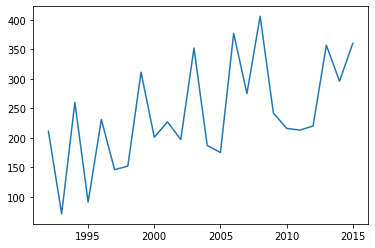

In [5]:
#Step 5
plt.plot(fires['Year'], fires['Fire_Count'])




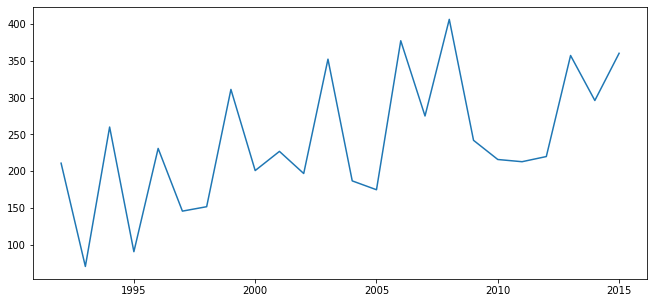

In [6]:
## Increase size "5 = Height"
plt.rcParams['figure.figsize'] = (11,5)
plt.plot(fires['Year'], fires['Fire_Count'])

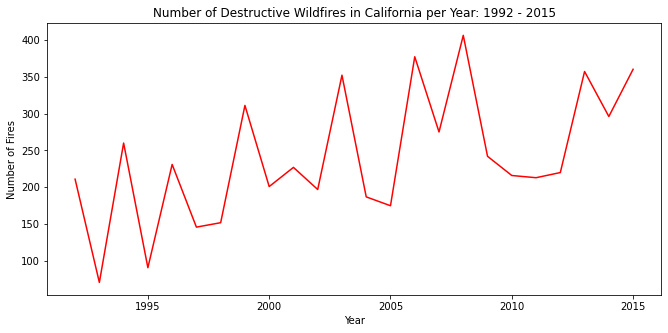

In [7]:
plt.rcParams['figure.figsize'] = (11,5)
plt.plot(fires['Year'], fires['Fire_Count'], color= 'r')
plt.title('Number of Destructive Wildfires in California per Year: 1992 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()

#Step 6: Calculate a three-year moving average for the fires data
  * Your instructor will walk you through this calculation.
  * Add a column to the `Fires` DataFrame named `Past_year` that contains the fire count from the previous year.  Use the `shift` function with `periods = 1`
  * Add a column to the `Fires` DataFrame named `Two_years` that contains the fire count from two years ago.  Use the `shift` function with `periods = 2`
  * Calculate the mean of `Fire_Count`, `Past_year`, and `Two_years` for each year in the DataFrame. Use the `mean` function with `axis=1`
  * Save the results as a new column in the `Fires` DataFrame called `3YMA`
  * Print the `Fires` DataFrame and note the results of your calculations.

In [8]:
#Step 6
fires['Past_year'] = fires['Fire_Count'].shift(periods=1)
fires

,Fire_Count,Year,Past_year
0,211,1992,NaN
1,71,1993,211.0
2,260,1994,71.0
3,91,1995,260.0
4,231,1996,91.0
5,146,1997,231.0
6,152,1998,146.0
7,311,1999,152.0
8,201,2000,311.0
9,227,2001,201.0


In [9]:
fires['Past_two_years'] = fires['Fire_Count'].shift(periods=2)
fires

,Fire_Count,Year,Past_year,Past_two_years
0,211,1992,NaN,NaN
1,71,1993,211.0,NaN
2,260,1994,71.0,211.0
3,91,1995,260.0,71.0
4,231,1996,91.0,260.0
5,146,1997,231.0,91.0
6,152,1998,146.0,231.0
7,311,1999,152.0,146.0
8,201,2000,311.0,152.0
9,227,2001,201.0,311.0


In [10]:
fires.dtypes

Fire_Count          int64
Year                int64
Past_year         float64
Past_two_years    float64
dtype: object

In [11]:
(260 + 71 + 211)/3

180.66666666666666

In [12]:
## 3 year moving avg
fires['3YMA'] = fires[['Fire_Count', 'Past_year', 'Past_two_years']].mean(axis=1)
fires

,Fire_Count,Year,Past_year,Past_two_years,3YMA
0,211,1992,NaN,NaN,211.000000
1,71,1993,211.0,NaN,141.000000
2,260,1994,71.0,211.0,180.666667
3,91,1995,260.0,71.0,140.666667
4,231,1996,91.0,260.0,194.000000
5,146,1997,231.0,91.0,156.000000
6,152,1998,146.0,231.0,176.333333
7,311,1999,152.0,146.0,203.000000
8,201,2000,311.0,152.0,221.333333
9,227,2001,201.0,311.0,246.333333


#Step 7: Create a line plot of the three-year moving average of wildfires and overlay it on a scatterplot of the count of wildfires in each year
* Your instructor will walk you through creating this graphic.

### For the line plot:
* Plot `Year` on the x-axis.
* Plot `3YMA` on the y-axis.
* Title the plot `Number of Destructive Wildfires in California per Year: 1992 - 2015`
* Add a y-axis label that reads `Number of Fires`
* Add an x-axis label that reads `Year`
* Add a legend using `plt.legend(["3-year Moving Average","Actual values"])`
* Color the line plot green by adding the parameter `'g'` in the plot statement.


###For the scatterplot:
* Plot `Year` on the x-axis.
* Plot `Fire_Count` on the y-axis.



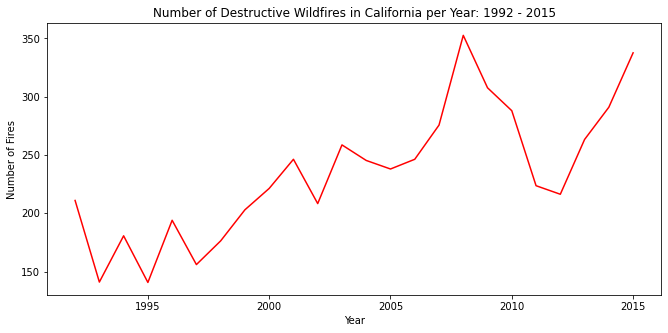

In [13]:
#Step 7 LINE PLOT
plt.rcParams['figure.figsize'] = (11,5)
plt.plot(fires['Year'], fires['3YMA'], color= 'r')
plt.title('Number of Destructive Wildfires in California per Year: 1992 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
# plt.legend(["3-year Moving Average","Actual values"])
plt.show()


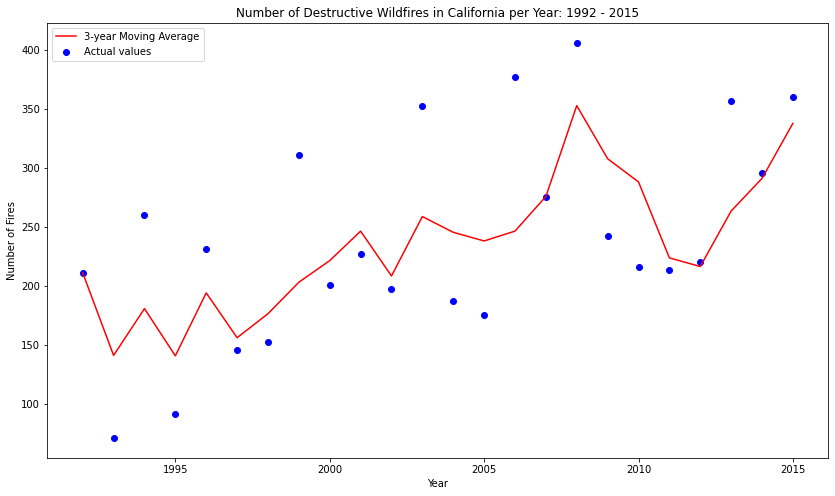

In [14]:
plt.rcParams['figure.figsize'] = (14,8)
plt.scatter(fires['Year'], fires['Fire_Count'], color= 'b')
plt.plot(fires['Year'], fires['3YMA'], color= 'r')
plt.title('Number of Destructive Wildfires in California per Year: 1992 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(["3-year Moving Average","Actual values"], loc = 'upper left')
plt.show()


#Step 8: Calculate a five-year moving average for the fires data 
  * You will modify your code from Step 6 to complete these calculations.
  * Add an additional column to the `Fires` DataFrame named `Three_years` that contains the fire count from three years ago.  Use the `shift` function with `periods = 3`
  * Add another column to the `Fires` DataFrame named `Four_years` that contains the fire count from four years ago.  Use the `shift` function with `periods = 4`
  * Calculate the mean of `Fire_Count`, `Past_year`, `Two_years`, `Three_years`, and `Four_years` for each year in the DataFrame. Use the `mean` function with `axis=1`
  * Save the results as a new column in the `Fires` DataFrame called `5YMA`
  * Print the `Fires` DataFrame and note the results of your calculations.

In [15]:
#Step 8
fires['Past_three_years'] = fires['Fire_Count'].shift(periods=3)
fires['Past_four_years'] = fires['Fire_Count'].shift(periods=4)
fires

,Fire_Count,Year,Past_year,Past_two_years,3YMA,Past_three_years,Past_four_years
0,211,1992,NaN,NaN,211.000000,NaN,NaN
1,71,1993,211.0,NaN,141.000000,NaN,NaN
2,260,1994,71.0,211.0,180.666667,NaN,NaN
3,91,1995,260.0,71.0,140.666667,211.0,NaN
4,231,1996,91.0,260.0,194.000000,71.0,211.0
5,146,1997,231.0,91.0,156.000000,260.0,71.0
6,152,1998,146.0,231.0,176.333333,91.0,260.0
7,311,1999,152.0,146.0,203.000000,231.0,91.0
8,201,2000,311.0,152.0,221.333333,146.0,231.0
9,227,2001,201.0,311.0,246.333333,152.0,146.0


In [17]:
fires['5YMA'] = fires[['Fire_Count', 'Past_year', 'Past_two_years', 'Past_three_years', 'Past_four_years']].mean(axis=1)
fires

,Fire_Count,Year,Past_year,Past_two_years,3YMA,Past_three_years,Past_four_years,5YMA
0,211,1992,NaN,NaN,211.000000,NaN,NaN,211.000000
1,71,1993,211.0,NaN,141.000000,NaN,NaN,141.000000
2,260,1994,71.0,211.0,180.666667,NaN,NaN,180.666667
3,91,1995,260.0,71.0,140.666667,211.0,NaN,158.250000
4,231,1996,91.0,260.0,194.000000,71.0,211.0,172.800000
5,146,1997,231.0,91.0,156.000000,260.0,71.0,159.800000
6,152,1998,146.0,231.0,176.333333,91.0,260.0,176.000000
7,311,1999,152.0,146.0,203.000000,231.0,91.0,186.200000
8,201,2000,311.0,152.0,221.333333,146.0,231.0,208.200000
9,227,2001,201.0,311.0,246.333333,152.0,146.0,207.400000


#Step 9: Create a line plot of the five-year moving average of wildfires and overlay it on a scatterplot of the count of wildfires in each year
* You will modify your code in Step 7 to complete this exercise.

### For the line plot:
* Plot `Year` on the x-axis.
* Plot `5YMA` on the y-axis.
* Title the plot `Number of Destructive Wildfires in California per Year: 1992 - 2015`
* Add a y-axis label that reads `Number of Fires`
* Add an x-axis label that reads `Year`
* Add a legend using `plt.legend(["5-year Moving Average","Actual values"])`
* Color the line plot yellow by adding the parameter `'y'` in the plot statement.


###For the scatterplot:
* Plot `Year` on the x-axis.
* Plot `Fire_count` on the y-axis.



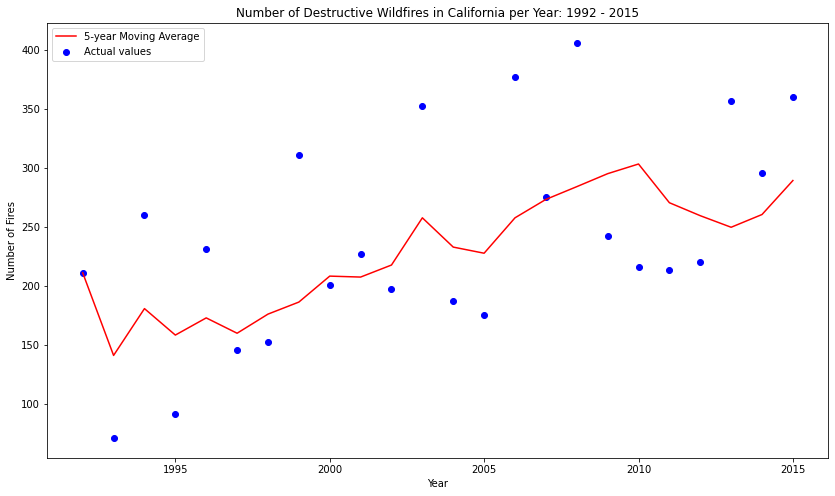

In [19]:
#Step 9
plt.rcParams['figure.figsize'] = (14,8)
plt.scatter(fires['Year'], fires['Fire_Count'], color= 'b')
plt.plot(fires['Year'], fires['5YMA'], color= 'r')
plt.title('Number of Destructive Wildfires in California per Year: 1992 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(["5-year Moving Average","Actual values"], loc = 'upper left')
plt.show()


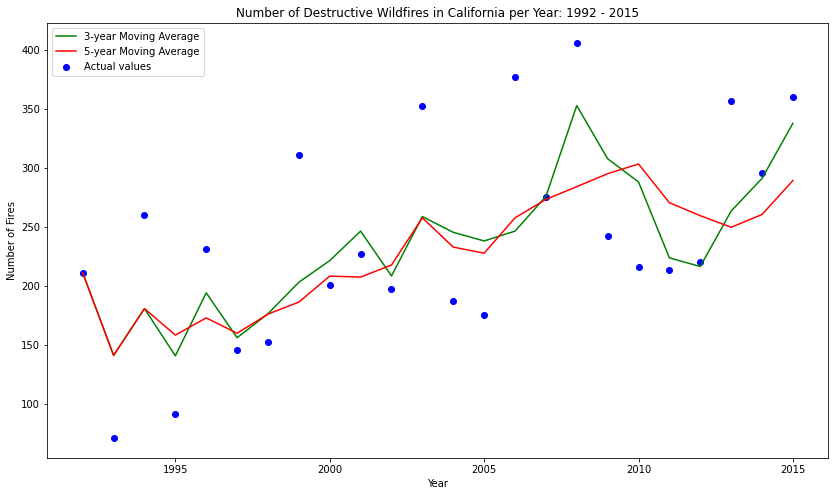

In [20]:
plt.rcParams['figure.figsize'] = (14,8)
plt.scatter(fires['Year'], fires['Fire_Count'], color= 'b')
plt.plot(fires['Year'], fires['3YMA'], color= 'g')
plt.plot(fires['Year'], fires['5YMA'], color= 'r')
plt.title('Number of Destructive Wildfires in California per Year: 1992 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(["3-year Moving Average", "5-year Moving Average","Actual values"], loc = 'upper left')
plt.show()


#Step 10: Use exponential smoothing to model the number of fires by year    
  * Run the code block below to generate a model of the number of fires per year using the `SimpleExpSmoothing` function from `statsmodels` (imported for you).
  * The code block will also plot the exponential smoothing model overlayed on top of a scatterplot of the actual values.

In [22]:
#Step 10

#Import SimpleExpSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing

#Calculate exponential smoothing model
ins1 = SimpleExpSmoothing(fires['Fire_Count']).fit(smoothing_level=0.2,optimized=False)
fires['Exp_sm'] = ins1.fittedvalues

In [24]:
fires

,Fire_Count,Year,Past_year,Past_two_years,3YMA,Past_three_years,Past_four_years,5YMA,Exp_sm
0,211,1992,NaN,NaN,211.000000,NaN,NaN,211.000000,211.000000
1,71,1993,211.0,NaN,141.000000,NaN,NaN,141.000000,211.000000
2,260,1994,71.0,211.0,180.666667,NaN,NaN,180.666667,183.000000
3,91,1995,260.0,71.0,140.666667,211.0,NaN,158.250000,198.400000
4,231,1996,91.0,260.0,194.000000,71.0,211.0,172.800000,176.920000
5,146,1997,231.0,91.0,156.000000,260.0,71.0,159.800000,187.736000
6,152,1998,146.0,231.0,176.333333,91.0,260.0,176.000000,179.388800
7,311,1999,152.0,146.0,203.000000,231.0,91.0,186.200000,173.911040
8,201,2000,311.0,152.0,221.333333,146.0,231.0,208.200000,201.328832
9,227,2001,201.0,311.0,246.333333,152.0,146.0,207.400000,201.263066


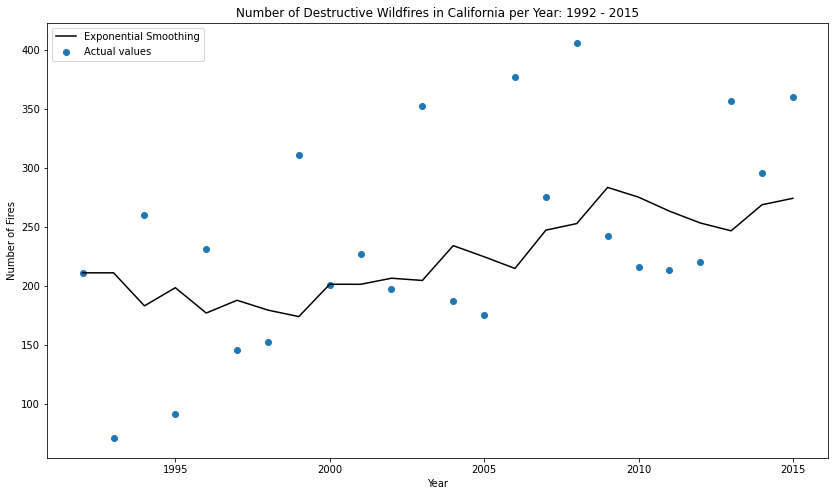

In [27]:
#Plot
plt.scatter(fires['Year'], fires['Fire_Count'])
plt.plot(fires['Year'], fires['Exp_sm'], 'k')
plt.legend(["Exponential Smoothing","Actual values"], loc = 'upper left')
plt.title('Number of Destructive Wildfires in California per Year: 1992 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()

#Step 11: Plot the data plus all three models    
  * Run the code block below to generate a plot of all three smoothing methods along with the actual data values.

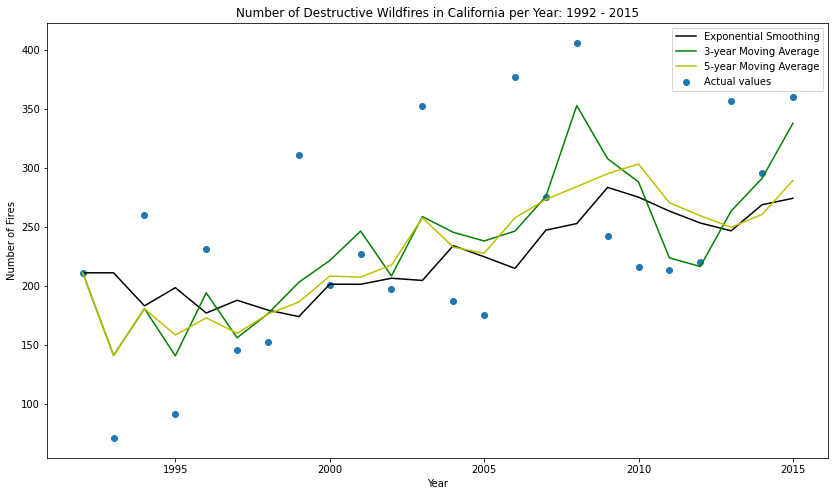

In [28]:
#Step 11

#Plot everything together in different colors
plt.scatter(fires['Year'], fires['Fire_Count'])
plt.plot(fires['Year'], fires['Exp_sm'], 'k')
plt.plot(fires['Year'], fires['3YMA'], 'g')
plt.plot(fires['Year'], fires['5YMA'], 'y')
plt.legend(["Exponential Smoothing","Actual values"], loc = 'upper left')
plt.title('Number of Destructive Wildfires in California per Year: 1992 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Fires')

plt.legend(["Exponential Smoothing", "3-year Moving Average", "5-year Moving Average","Actual values"])
plt.show()

#Step 12: Compare the three models   
  * Which models(s) follow the data most closely?
  * Which models(s) seem to smooth out fluctuations between years the best?
  * Why might you prefer a model that fits the data very closely?  
  * Why might you prefer a model that smooths out fluctuations?

#Step 13: Advice to the governor  
  * Do you think that destructive wildfires in California are on the rise?
  * What evidence can you give in support of your conclusion?